In [1]:
import re
import pandas as pd

In [2]:
wiki_df = pd.read_csv("wiki_formal_total_clean.csv")
blog_df = pd.read_csv("blog_clean.csv")
maga_df = pd.read_csv("maga_clean.csv")

In [3]:
blog_df=blog_df[['Title','Author','Body','Like','Comment']]
wiki_df=wiki_df[['Title','Author','Content','Like']]
maga_df=maga_df[['Article','Author','Content']]

In [4]:
blog_df.rename(columns = {'Body':'Content'}, inplace = True) 
maga_df.rename(columns = {'Article':'Title'}, inplace = True) 
blog_df['Source']='blog'
wiki_df['Source']='wiki'
maga_df['Source']='maga'
df_total=blog_df.append(wiki_df, ignore_index=True)
df_total=df_total.append(maga_df, ignore_index=True)

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
df_total.iloc[:,0]=df_total.iloc[:,0].apply(lambda x:x.lower())
df_total.iloc[:,2]=df_total.iloc[:,2].apply(lambda x:x.lower())
df_total.iloc[:,5]=df_total.iloc[:,5].apply(lambda x:x.lower())


In [6]:
import pandasql as ps

In [7]:

q1 = """SELECT Author, count(Author) as AuthorPost,sum(Like) as AuthorLike  FROM df_total GROUP BY Author ORDER BY count(Author) desc"""

Author_tb=ps.sqldf(q1, locals())
Author_tb['AuthorLikeProp']=Author_tb['AuthorLike']/Author_tb['AuthorPost']
Author_tb=Author_tb.sort_values('AuthorLikeProp', ascending=False)

In [8]:
df_total=pd.merge(Author_tb, df_total, left_on='Author', right_on='Author')

In [9]:
raw_data = {
        'Source': ['wiki','blog','maga'],
        'SourceScore': ['1', '3', '2']}
Source_tb = pd.DataFrame(raw_data, columns = ['Source', 'SourceScore'])
df_total=pd.merge(Source_tb, df_total, left_on='Source', right_on='Source')


Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

Words that have fewer than 3 characters are removed.

All stopwords are removed.

Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

http://zacstewart.com/2015/04/28/document-classification-with-scikit-learn.html

https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

https://machinelearningmastery.com/best-practices-document-classification-deep-learning/

# Search Engine Setup

## Simple title-content table 

In [6]:
wiki_text=wiki_df['Title']+wiki_df['Content']

In [8]:
blog_text=blog_df['Title']+blog_df['Body']

In [10]:
maga_text=maga_df['Article']+maga_df['Content']

In [12]:
wiki_text[2]

'Nose Wheel Pant and Strut Beating at Oshkosh 2017Yesterday, I made my first trek over to Oshkosh this year for Airventure. I\'ve never been before, and wanting to have another pilot, I decided to bring my CSIP instructor and 2 other PAX. I didn\'t have time to spend overnight so we just did a quick day trip, plus the flight was only an hour and a half from my home base.After a fun day at the show we went back to airplane which was parked on the grass in row 625 in the North Forty and fired her up and began to taxi back to the edge of the concrete taxiway. As all of you know, any airplane needs more power to get going in the grass, even more so with 4 people, so once we got out of our parking spot I kept the plane going with the yolk all the way back at a safe and reasonable taxi speed. The parking rows were rather narrow at the end of the day and you had to pay attention to your wing clearance on both sides, so far so good. Upon reaching the transition edge of the grass to the concret

## Test-Preprocessing

In [59]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xingxuan_dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xingxuan_dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

In [34]:
wiki_preprocess=wiki_text.map(preprocess)

In [37]:
dictionary =gensim.corpora.Dictionary(wiki_preprocess)
print(dictionary)

Dictionary(6831 unique tokens: ['center', 'hard', 'plane', 'routin', 'say']...)


In [42]:
bow_corpus = [dictionary.doc2bow(doc) for doc in wiki_preprocess]
test=bow_corpus[2]
for i in range(len(test)):
    print("Word {} (\"{}\") appears {} time.".format(test[i][0], 
                                               dictionary[test[i][0]], test[i][1]))

Word 2 ("plane") appears 3 time.
Word 4 ("say") appears 2 time.
Word 7 ("week") appears 1 time.
Word 18 ("immedi") appears 1 time.
Word 21 ("need") appears 1 time.
Word 25 ("abl") appears 1 time.
Word 26 ("air") appears 1 time.
Word 27 ("aircraft") appears 1 time.
Word 28 ("airplan") appears 4 time.
Word 29 ("airventur") appears 1 time.
Word 30 ("angl") appears 1 time.
Word 31 ("appear") appears 2 time.
Word 32 ("ask") appears 2 time.
Word 33 ("asphalt") appears 1 time.
Word 34 ("attent") appears 1 time.
Word 35 ("avoid") appears 1 time.
Word 36 ("away") appears 1 time.
Word 37 ("bang") appears 1 time.
Word 38 ("base") appears 1 time.
Word 39 ("beat") appears 1 time.
Word 40 ("beauti") appears 1 time.
Word 41 ("begin") appears 1 time.
Word 42 ("bend") appears 1 time.
Word 43 ("better") appears 1 time.
Word 44 ("breakfast") appears 1 time.
Word 45 ("bring") appears 2 time.
Word 46 ("cancel") appears 1 time.
Word 47 ("car") appears 1 time.
Word 48 ("chang") appears 1 time.
Word 49 ("clea

In [43]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4522106249331085),
 (1, 0.2640056506479985),
 (2, 0.17129300618255303),
 (3, 0.3493368674031285),
 (4, 0.21778581985380221),
 (5, 0.18590483696230986),
 (6, 0.48438196398373695),
 (7, 0.3170999315243897),
 (8, 0.3592432331402325),
 (9, 0.16793987117867257)]


## Try: simple search

In [4]:
wiki_df

,Topic,Level,Title,Link,with_sublevel,Author,Date,Like,Content,Time,Weekday
0,Welcome to COPApedia as a Wiki,2,Are there any service centers that routinely w...,https://www.cirruspilots.org/copa/member/sr_ai...,No,ctrease,2017-05-23,0,Title says it all.It is often hard for me to g...,09:05:00,Tuesday
1,Welcome to COPApedia as a Wiki,2,Door Decals,https://www.cirruspilots.org/copa/member/sr_ai...,No,Mark Craig,2018-09-26,0,Looking for right side door stripe decals.As i...,06:01:00,Wednesday
2,Welcome to COPApedia as a Wiki,2,Nose Wheel Pant and Strut Beating at Oshkosh 2017,https://www.cirruspilots.org/copa/member/sr_ai...,No,Stuart Simek,2017-07-31,0,"Yesterday, I made my first trek over to Oshkos...",09:32:00,Monday
3,Welcome to COPApedia as a Wiki,2,Oil Door Support for Summer Time Cooling,https://www.cirruspilots.org/copa/member/sr_ai...,No,Michael Samp,2016-08-25,1,"I am based in Colorado Springs, CO and often s...",04:31:00,Thursday
4,Welcome to COPApedia as a Wiki,2,Prop Strike Advice Needed,https://www.cirruspilots.org/copa/member/sr_ai...,No,John Shaeffer,2016-03-10,0,Had a prop strike in my SR-20 this past weeken...,22:54:00,Thursday
5,Welcome to COPApedia as a Wiki,2,Regards from Chile / New pilot owner!,https://www.cirruspilots.org/copa/member/sr_ai...,No,Roberto Dabed,2014-10-17,0,"""As I say, regards from Chile. I'm a new pilot...",13:03:00,Friday
6,Welcome to COPApedia as a Wiki,2,Spots of corrosion on elevator - where else?,https://www.cirruspilots.org/copa/member/sr_ai...,No,Jim Lewis,2018-01-02,0,"I've been watching a tiny (1/2"") bump under th...",03:31:00,Tuesday
7,Welcome to COPApedia as a Wiki,2,Tires and Tubes,https://www.cirruspilots.org/copa/member/sr_ai...,No,John Evans,2016-04-15,0,I notice there has not been much discussion ab...,06:44:00,Friday
8,Accessories,2,Emergency accessories,https://www.cirruspilots.org/copa/member/sr_ai...,No,Eharrison,2013-08-17,0,Emergency Accessories,00:11:00,Saturday
9,Accessories,2,Entertainment accessories,https://www.cirruspilots.org/copa/member/sr_ai...,Yes,Peter Storer,2014-04-30,0,Low aux audio volume problem,01:31:00,Wednesday


In [11]:
wiki_df['Count']=wiki_df.Content.apply(lambda x:len(x))

In [45]:
wiki_df.iloc[306]

Topic                                             Safety equipment
Level                                                            3
Title                                               Oxygen Systems
Link             https://www.cirruspilots.org/copa/member/sr_ai...
with_sublevel                                                   No
Author                                                   Eharrison
Date                                                    2013-08-16
Like                                                             0
Content          "Member CommentsThe Mountain High pulse system...
Time                                                      23:20:00
Weekday                                                     Friday
Count                                                         1735
Name: 306, dtype: object

In [76]:
def search_engine(x,y):
    if x=='Start':
        
       
        #Content_list=[]
        #for word in y:
            #Content_list.append(wiki_df.Content.apply(lambda x:re.findall(word,x)))
        Content_list=wiki_df.Content.apply(lambda x:re.findall(y,x))
        result=[]
        for x in range(len(wiki_df)):
            if len(Content_list[x])!=0:
                result.append(x)
            else:
                continue
        return wiki_df.iloc[result]
    else:
        return 'Error'

In [77]:
search_engine('Start','Oxygen')

,Topic,Level,Title,Link,with_sublevel,Author,Date,Like,Content,Time,Weekday,Count
39,Operations,2,Oxygen,https://www.cirruspilots.org/copa/member/sr_ai...,Yes,Eharrison,2013-08-16,0,Oxygen,22:33:00,Friday,6
88,Airframe maintenance,3,Cirrus components manufacturer's links,https://www.cirruspilots.org/copa/member/sr_ai...,No,Scott Philiben,2014-09-10,0,Here are links to some of the manufacturers of...,12:16:00,Wednesday,940
306,Safety equipment,3,Oxygen Systems,https://www.cirruspilots.org/copa/member/sr_ai...,No,Eharrison,2013-08-16,0,"""Member CommentsThe Mountain High pulse system...",23:20:00,Friday,1735


In [47]:
#search
Content_list=wiki_df.Content.apply(lambda x:re.findall('Oxygen',x))
result=[]
for x in range(len(wiki_df)):
    if len(Content_list[x])!=0:
        result.append(x)
    else:
        continue

In [48]:
result

[39, 88, 306]

In [62]:
#Preprocessing
y='How to set up oxygen system'

stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

In [63]:
preprocess(y)

['set', 'oxygen']

# Sentiment Analysis

In [10]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [11]:
df_total['ContentSubjective']=df_total.Content.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [12]:
df_total['ContentSubjective']=df_total['ContentSubjective'].apply(lambda x:round(x,1))

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

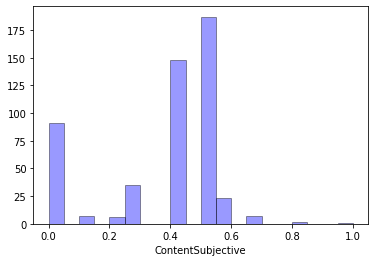

In [14]:
sns.distplot(df_total['ContentSubjective'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [15]:
df_total['ContentLen']=df_total.Content.apply(lambda x:len(x))

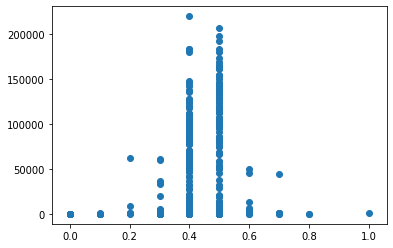

In [16]:
plt.scatter(df_total.ContentSubjective, df_total.ContentLen)

In [17]:
df_total=df_total[['SourceScore','AuthorLikeProp','Comment','Content','Like','Title','ContentSubjective','ContentLen']]

In [18]:
df_total

,SourceScore,AuthorLikeProp,Comment,Content,Like,Title,ContentSubjective,ContentLen
0,1,1.000000,NaN,"i am based in colorado springs, co and often s...",1.0,oil door support for summer time cooling,0.5,695
1,1,0.750000,NaN,"""can i fix my audio volume problem?actually, t...",0.0,low aux audio volume problem,0.4,5520
2,1,0.750000,NaN,activating garmin 396contentsstep 1step 2step ...,0.0,activating garmin 396,0.5,952
3,1,0.750000,NaN,"a good reason to do your own oil change, or at...",3.0,oil change,0.4,13756
4,1,0.750000,NaN,contentsmicrosoft flight simulator x (fsx) and...,0.0,microsoft flight simulator,0.5,5976
5,1,0.250000,NaN,"the general aviation modifications, inc. (gami...",0.0,gami lean test,0.4,3546
6,1,0.250000,NaN,"""the standard pre-flight engine run-up check i...",1.0,in-flight lop magneto check,0.5,6511
7,1,0.250000,NaN,lean of peakcan you run your engine lean of pe...,0.0,lean of peak engine operation,0.4,1553
8,1,0.250000,NaN,use the following chart to better describe iss...,0.0,magnetos and spark plug location,0.3,100
9,1,0.103448,NaN,low aux audio volume problem,0.0,entertainment accessories,0.3,28


# Topic Modeling

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [20]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [22]:
# Convert to list
data = df_total.Content.values.tolist()

In [30]:
# Remove distracting single quotes
data = [re.sub("\?€\?", "", sent) for sent in data]


<>:2: DeprecationWarning: invalid escape sequence \?
<>:2: DeprecationWarning: invalid escape sequence \?
<>:2: DeprecationWarning: invalid escape sequence \?
<ipython-input-30-49f2c7044158>:2: DeprecationWarning: invalid escape sequence \?
  data = [re.sub("\?€\?", "", sent) for sent in data]


In [31]:
data[1]

'"can i fix my audio volume problem?actually, the problem is not with the audio volume, but is an electrical impedance mismatch issue. the consumer electronics industry has standardized to an impedance value of 8 ohms, while the avionics industry has standardized to an impedance value of 600 ohms. while neither is particularly better or worse than the other, they are indeed different.the end result is that power will be lost when a consumer electronics device (with its 8 ohm standard) is plugged into the audio jack on your avionics panel (with its 600 ohm standard). and lost power equates to lower volume.contentsa solutionyes, you too can build one!audio panel jumper modificationother alternativea solutionone solution is to simply turn up the volume on your music device to compensate for the power loss. however, this is not an optimal solution as most audio devices have poor sound quality at high volume settings. in addition, this solution doesnt actually address the problem, it simply

In [33]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
data_words[0]

['am',
 'based',
 'in',
 'colorado',
 'springs',
 'co',
 'and',
 'often',
 'see',
 'usaf',
 'academy',
 'sr',
 'around',
 'the',
 'state',
 'recently',
 'parked',
 'next',
 'to',
 'pair',
 'of',
 'them',
 'at',
 'centennial',
 'on',
 'hot',
 'day',
 'saw',
 'they',
 'had',
 'really',
 'neat',
 'supports',
 'to',
 'hold',
 'the',
 'oil',
 'door',
 'open',
 'on',
 'the',
 'top',
 'of',
 'the',
 'cowling',
 'to',
 'allow',
 'the',
 'heat',
 'to',
 'escape',
 'while',
 'parked',
 'on',
 'the',
 'ramp',
 'have',
 'often',
 'wanted',
 'to',
 'leave',
 'the',
 'door',
 'open',
 'but',
 'the',
 'wind',
 'would',
 'blow',
 'it',
 'shut',
 'the',
 'attached',
 'photos',
 'show',
 'what',
 'reverse',
 'engineered',
 'from',
 'looking',
 'at',
 'the',
 'usaf',
 'sr',
 'made',
 'it',
 'from',
 'about',
 'of',
 'materials',
 'from',
 'home',
 'depot',
 'needed',
 'about',
 'of',
 'small',
 'pvc',
 'pipe',
 'two',
 'degree',
 'elbows',
 'and',
 'about',
 'of',
 'foam',
 'pipe',
 'insulation',
 'it',


In [34]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
# higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['am', 'based', 'in', 'colorado_springs', 'co', 'and', 'often', 'see', 'usaf', 'academy', 'sr', 'around', 'the', 'state', 'recently', 'parked', 'next', 'to', 'pair', 'of', 'them', 'at', 'centennial', 'on', 'hot', 'day', 'saw', 'they', 'had', 'really', 'neat', 'supports', 'to', 'hold', 'the', 'oil', 'door', 'open', 'on', 'the', 'top', 'of', 'the', 'cowling', 'to', 'allow', 'the', 'heat', 'to', 'escape', 'while', 'parked', 'on', 'the', 'ramp', 'have', 'often', 'wanted', 'to', 'leave', 'the', 'door', 'open', 'but', 'the', 'wind', 'would', 'blow', 'it', 'shut', 'the', 'attached', 'photos', 'show', 'what', 'reverse', 'engineered', 'from', 'looking', 'at', 'the', 'usaf', 'sr', 'made', 'it', 'from', 'about', 'of', 'materials', 'from', 'home', 'depot', 'needed', 'about', 'of', 'small', 'pvc', 'pipe', 'two', 'degree', 'elbows', 'and', 'about', 'of', 'foam', 'pipe', 'insulation', 'it', 'works', 'fantastic', 'and', 'minimizes', 'the', 'fuel', 'line', 'vaporization', 'so', 'common', 'on', 'the', '

In [35]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [36]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['base', 'colorado_spring', 'co', 'often', 'see', 'state', 'recently', 'park', 'next', 'pair', 'centennial', 'hot', 'day', 'see', 'really', 'neat', 'support', 'hold', 'oil', 'door', 'open', 'top', 'cowl', 'allow', 'heat', 'escape', 'park', 'ramp', 'often', 'want', 'leave', 'door', 'open', 'wind', 'blow', 'shut', 'attached', 'photo', 'show', 'reverse', 'engineer', 'look', 'usaf', 'make', 'material', 'home', 'need', 'small', 'pipe', 'degree', 'elbow', 'pipe', 'insulation', 'work', 'fantastic', 'minimize', 'fuel', 'line', 'vaporization', 'common']]


In [37]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)]]


In [77]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

2019-12-25 15:55:42,524 : INFO : using autotuned alpha, starting with [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
2019-12-25 15:55:42,525 : INFO : using symmetric eta at 0.05
2019-12-25 15:55:42,529 : INFO : using serial LDA version on this node
2019-12-25 15:55:42,566 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 507 documents, updating model once every 100 documents, evaluating perplexity every 507 documents, iterating 50x with a convergence threshold of 0.001000
2019-12-25 15:55:42,570 : INFO : PROGRESS: pass 0, at document #100/507
2019-12-25 15:55:42,685 : INFO : optimized alpha [0.059241116, 0.059258882, 0.06464117, 0.05827225, 0.05851279, 0.059782267, 0.05901278, 0.06742394, 0.062116355, 0.061124586, 0.06328154, 0.06635308, 0.05730825, 0.06109492, 0.05921076, 0.0567963, 0.053854026, 0.057488795, 0.06270337, 0.05714471]
2019-12-25 15:55:42,727 : INFO 

2019-12-25 15:55:43,672 : INFO : topic #11 (0.227): 0.031*"pilot" + 0.020*"aircraft" + 0.018*"cirrus" + 0.010*"flight" + 0.009*"fly" + 0.008*"training" + 0.008*"use" + 0.008*"time" + 0.007*"year" + 0.007*"make"
2019-12-25 15:55:43,677 : INFO : topic diff=0.504917, rho=0.447214
2019-12-25 15:55:43,787 : INFO : -12.855 per-word bound, 7408.4 perplexity estimate based on a held-out corpus of 7 documents with 39373 words
2019-12-25 15:55:43,789 : INFO : PROGRESS: pass 0, at document #507/507
2019-12-25 15:55:43,815 : INFO : optimized alpha [0.071724705, 0.030782333, 0.062355697, 0.09287624, 0.0303578, 0.04798009, 0.051567495, 0.24968816, 0.10257572, 0.05283697, 0.088574424, 0.3221353, 0.030931119, 0.1537591, 0.031916283, 0.10264223, 0.029446417, 0.11000758, 0.12779097, 0.03572579]
2019-12-25 15:55:43,856 : INFO : merging changes from 7 documents into a model of 507 documents
2019-12-25 15:55:43,893 : INFO : topic #16 (0.029): 0.029*"powerplant" + 0.001*"article" + 0.000*"member" + 0.000*"c

2019-12-25 15:55:44,777 : INFO : topic diff=0.512128, rho=0.376089
2019-12-25 15:55:44,779 : INFO : PROGRESS: pass 1, at document #500/507
2019-12-25 15:55:44,917 : INFO : optimized alpha [0.07709763, 0.024477186, 0.06183724, 0.09628551, 0.023728248, 0.047187217, 0.049089227, 0.4477167, 0.11418359, 0.04457824, 0.091628015, 0.7716665, 0.024820665, 0.18998732, 0.025405845, 0.12723662, 0.02377642, 0.12028609, 0.19017047, 0.03158045]
2019-12-25 15:55:44,953 : INFO : merging changes from 100 documents into a model of 507 documents
2019-12-25 15:55:44,980 : INFO : topic #4 (0.024): 0.000*"image" + 0.000*"oil" + 0.000*"copa" + 0.000*"article" + 0.000*"engine" + 0.000*"use" + 0.000*"hour" + 0.000*"time" + 0.000*"plug" + 0.000*"post"
2019-12-25 15:55:44,982 : INFO : topic #16 (0.024): 0.045*"powerplant" + 0.000*"article" + 0.000*"member" + 0.000*"copa" + 0.000*"operation" + 0.000*"view" + 0.000*"point" + 0.000*"time" + 0.000*"content" + 0.000*"vibration"
2019-12-25 15:55:44,985 : INFO : topic #

2019-12-25 15:55:45,823 : INFO : optimized alpha [0.07648142, 0.020975687, 0.06472663, 0.100584656, 0.019889506, 0.047400616, 0.04510915, 0.62511945, 0.13637602, 0.047471732, 0.093174204, 1.1839628, 0.020935703, 0.21881533, 0.021482887, 0.13533998, 0.020271296, 0.13624108, 0.26891944, 0.028775593]
2019-12-25 15:55:45,860 : INFO : merging changes from 100 documents into a model of 507 documents
2019-12-25 15:55:45,910 : INFO : topic #4 (0.020): 0.000*"image" + 0.000*"oil" + 0.000*"copa" + 0.000*"article" + 0.000*"engine" + 0.000*"use" + 0.000*"hour" + 0.000*"time" + 0.000*"plug" + 0.000*"post"
2019-12-25 15:55:45,913 : INFO : topic #16 (0.020): 0.023*"powerplant" + 0.000*"article" + 0.000*"member" + 0.000*"copa" + 0.000*"operation" + 0.000*"view" + 0.000*"point" + 0.000*"time" + 0.000*"content" + 0.000*"vibration"
2019-12-25 15:55:45,915 : INFO : topic #18 (0.269): 0.018*"oil" + 0.016*"use" + 0.013*"lunch" + 0.013*"engine" + 0.008*"pressure" + 0.008*"hour" + 0.007*"start" + 0.006*"wing"

2019-12-25 15:55:46,850 : INFO : merging changes from 100 documents into a model of 507 documents
2019-12-25 15:55:46,903 : INFO : topic #4 (0.017): 0.000*"image" + 0.000*"oil" + 0.000*"copa" + 0.000*"article" + 0.000*"engine" + 0.000*"use" + 0.000*"hour" + 0.000*"time" + 0.000*"plug" + 0.000*"post"
2019-12-25 15:55:46,905 : INFO : topic #16 (0.018): 0.013*"powerplant" + 0.000*"article" + 0.000*"member" + 0.000*"copa" + 0.000*"operation" + 0.000*"view" + 0.000*"point" + 0.000*"time" + 0.000*"content" + 0.000*"vibration"
2019-12-25 15:55:46,908 : INFO : topic #18 (0.305): 0.026*"oil" + 0.018*"engine" + 0.014*"use" + 0.013*"pressure" + 0.009*"bulletin" + 0.008*"release" + 0.008*"hour" + 0.007*"top" + 0.007*"start" + 0.006*"wing"
2019-12-25 15:55:46,910 : INFO : topic #7 (0.625): 0.014*"fly" + 0.014*"take" + 0.013*"time" + 0.012*"pilot" + 0.011*"make" + 0.011*"copa" + 0.010*"land" + 0.010*"trip" + 0.010*"year" + 0.010*"go"
2019-12-25 15:55:46,912 : INFO : topic #11 (1.188): 0.031*"pilot" 

2019-12-25 15:55:48,336 : INFO : topic #16 (0.016): 0.017*"powerplant" + 0.000*"article" + 0.000*"member" + 0.000*"copa" + 0.000*"operation" + 0.000*"view" + 0.000*"point" + 0.000*"time" + 0.000*"content" + 0.000*"vibration"
2019-12-25 15:55:48,337 : INFO : topic #18 (0.284): 0.025*"oil" + 0.021*"engine" + 0.015*"use" + 0.013*"pressure" + 0.008*"release" + 0.008*"top" + 0.008*"hour" + 0.007*"start" + 0.007*"bulletin" + 0.007*"turn"
2019-12-25 15:55:48,339 : INFO : topic #7 (0.628): 0.014*"fly" + 0.014*"take" + 0.013*"time" + 0.012*"make" + 0.011*"pilot" + 0.011*"copa" + 0.011*"trip" + 0.011*"go" + 0.010*"year" + 0.010*"day"
2019-12-25 15:55:48,342 : INFO : topic #11 (1.193): 0.030*"pilot" + 0.019*"cirrus" + 0.015*"aircraft" + 0.015*"flight" + 0.011*"fly" + 0.008*"number" + 0.008*"make" + 0.007*"use" + 0.007*"landing" + 0.007*"year"
2019-12-25 15:55:48,346 : INFO : topic diff=0.217941, rho=0.315127
2019-12-25 15:55:48,349 : INFO : PROGRESS: pass 4, at document #300/507
2019-12-25 15:55:

2019-12-25 15:55:49,732 : INFO : topic #13 (0.296): 0.043*"pilot" + 0.035*"waiver" + 0.024*"aircraft" + 0.018*"com" + 0.015*"aviation" + 0.015*"part" + 0.013*"easy" + 0.013*"chain" + 0.012*"need" + 0.012*"life"
2019-12-25 15:55:49,735 : INFO : topic #7 (0.593): 0.014*"fly" + 0.013*"take" + 0.013*"time" + 0.012*"make" + 0.012*"trip" + 0.011*"copa" + 0.011*"go" + 0.011*"pilot" + 0.011*"day" + 0.010*"year"
2019-12-25 15:55:49,738 : INFO : topic #11 (1.190): 0.030*"pilot" + 0.019*"cirrus" + 0.015*"flight" + 0.015*"aircraft" + 0.012*"fly" + 0.009*"number" + 0.008*"landing" + 0.008*"make" + 0.007*"use" + 0.007*"time"
2019-12-25 15:55:49,741 : INFO : topic diff=0.207477, rho=0.300557
2019-12-25 15:55:49,747 : INFO : PROGRESS: pass 5, at document #200/507
2019-12-25 15:55:49,855 : INFO : optimized alpha [0.10489543, 0.014822541, 0.081127435, 0.11093231, 0.013237387, 0.053383928, 0.05381687, 0.62773407, 0.15907846, 0.055354103, 0.12228503, 1.1657736, 0.013959541, 0.29737404, 0.014970865, 0.1565

2019-12-25 15:55:50,996 : INFO : topic #7 (0.593): 0.014*"fly" + 0.013*"take" + 0.013*"make" + 0.012*"trip" + 0.012*"time" + 0.012*"go" + 0.011*"copa" + 0.011*"day" + 0.010*"pilot" + 0.010*"year"
2019-12-25 15:55:50,998 : INFO : topic #11 (1.408): 0.029*"pilot" + 0.018*"cirrus" + 0.016*"flight" + 0.015*"aircraft" + 0.013*"fly" + 0.009*"number" + 0.008*"landing" + 0.008*"make" + 0.007*"use" + 0.007*"control"
2019-12-25 15:55:51,002 : INFO : topic diff=0.222633, rho=0.300557
2019-12-25 15:55:51,005 : INFO : PROGRESS: pass 6, at document #100/507
2019-12-25 15:55:51,100 : INFO : optimized alpha [0.117128216, 0.013815902, 0.086212985, 0.121644124, 0.012017341, 0.055185687, 0.05735601, 0.5908358, 0.16486621, 0.059091527, 0.13052669, 1.1617633, 0.012684019, 0.3205545, 0.01370813, 0.16812164, 0.012945366, 0.20823827, 0.2700494, 0.022273203]
2019-12-25 15:55:51,125 : INFO : merging changes from 100 documents into a model of 507 documents
2019-12-25 15:55:51,158 : INFO : topic #4 (0.012): 0.000

2019-12-25 15:55:52,196 : INFO : topic diff=0.173462, rho=0.287837
2019-12-25 15:55:52,262 : INFO : -12.380 per-word bound, 5329.1 perplexity estimate based on a held-out corpus of 7 documents with 39373 words
2019-12-25 15:55:52,265 : INFO : PROGRESS: pass 6, at document #507/507
2019-12-25 15:55:52,280 : INFO : optimized alpha [0.12979844, 0.013054287, 0.0866255, 0.13467818, 0.011082847, 0.05435971, 0.06133326, 0.57951105, 0.17167722, 0.060525876, 0.14386266, 1.3530313, 0.011680933, 0.37035102, 0.012717727, 0.18806617, 0.012067422, 0.23515798, 0.24131252, 0.021462092]
2019-12-25 15:55:52,312 : INFO : merging changes from 7 documents into a model of 507 documents
2019-12-25 15:55:52,347 : INFO : topic #4 (0.011): 0.000*"image" + 0.000*"oil" + 0.000*"copa" + 0.000*"article" + 0.000*"engine" + 0.000*"use" + 0.000*"hour" + 0.000*"time" + 0.000*"plug" + 0.000*"post"
2019-12-25 15:55:52,349 : INFO : topic #12 (0.012): 0.011*"motel" + 0.000*"agent" + 0.000*"smoke" + 0.000*"deep" + 0.000*"la

2019-12-25 15:55:53,360 : INFO : merging changes from 100 documents into a model of 507 documents
2019-12-25 15:55:53,398 : INFO : topic #4 (0.010): 0.000*"image" + 0.000*"oil" + 0.000*"copa" + 0.000*"article" + 0.000*"engine" + 0.000*"use" + 0.000*"time" + 0.000*"hour" + 0.000*"plug" + 0.000*"post"
2019-12-25 15:55:53,402 : INFO : topic #12 (0.011): 0.015*"motel" + 0.000*"agent" + 0.000*"smoke" + 0.000*"lake" + 0.000*"deep" + 0.000*"eastern" + 0.000*"rock" + 0.000*"village" + 0.000*"lie" + 0.000*"northern_neighbor"
2019-12-25 15:55:53,405 : INFO : topic #13 (0.432): 0.057*"pilot" + 0.040*"aircraft" + 0.019*"aviation" + 0.018*"part" + 0.017*"business" + 0.017*"com" + 0.014*"volume" + 0.011*"company" + 0.011*"family" + 0.011*"life"
2019-12-25 15:55:53,407 : INFO : topic #7 (0.941): 0.015*"fly" + 0.012*"make" + 0.012*"time" + 0.012*"trip" + 0.012*"day" + 0.011*"take" + 0.011*"go" + 0.010*"copa" + 0.009*"year" + 0.009*"pilot"
2019-12-25 15:55:53,409 : INFO : topic #11 (1.426): 0.031*"pilo

2019-12-25 15:55:54,455 : INFO : topic #12 (0.010): 0.004*"motel" + 0.000*"agent" + 0.000*"smoke" + 0.000*"lie" + 0.000*"deep" + 0.000*"village" + 0.000*"lake" + 0.000*"eastern" + 0.000*"rock" + 0.000*"visitor"
2019-12-25 15:55:54,459 : INFO : topic #13 (0.394): 0.057*"pilot" + 0.042*"aircraft" + 0.018*"part" + 0.018*"com" + 0.018*"aviation" + 0.015*"business" + 0.013*"waiver" + 0.013*"volume" + 0.012*"need" + 0.011*"even"
2019-12-25 15:55:54,462 : INFO : topic #7 (0.795): 0.014*"fly" + 0.012*"day" + 0.012*"make" + 0.011*"time" + 0.011*"go" + 0.011*"copa" + 0.010*"trip" + 0.010*"take" + 0.010*"see" + 0.009*"pilot"
2019-12-25 15:55:54,465 : INFO : topic #11 (1.272): 0.030*"pilot" + 0.019*"flight" + 0.017*"cirrus" + 0.015*"aircraft" + 0.014*"fly" + 0.010*"number" + 0.008*"landing" + 0.008*"use" + 0.008*"control" + 0.007*"make"
2019-12-25 15:55:54,470 : INFO : topic diff=0.259889, rho=0.266596
2019-12-25 15:55:54,473 : INFO : PROGRESS: pass 8, at document #500/507
2019-12-25 15:55:54,804 

2019-12-25 15:55:55,668 : INFO : topic #13 (0.367): 0.051*"pilot" + 0.042*"aircraft" + 0.027*"waiver" + 0.018*"part" + 0.017*"com" + 0.016*"aviation" + 0.012*"need" + 0.012*"sign" + 0.011*"easy" + 0.011*"volume"
2019-12-25 15:55:55,672 : INFO : topic #7 (0.671): 0.015*"fly" + 0.013*"make" + 0.012*"trip" + 0.012*"go" + 0.011*"take" + 0.011*"time" + 0.011*"day" + 0.010*"copa" + 0.009*"see" + 0.009*"year"
2019-12-25 15:55:55,675 : INFO : topic #11 (1.145): 0.028*"pilot" + 0.018*"flight" + 0.017*"cirrus" + 0.015*"fly" + 0.014*"aircraft" + 0.010*"number" + 0.009*"landing" + 0.007*"use" + 0.007*"learn" + 0.007*"make"
2019-12-25 15:55:55,682 : INFO : topic diff=0.175154, rho=0.257599
2019-12-25 15:55:55,684 : INFO : PROGRESS: pass 9, at document #400/507
2019-12-25 15:55:55,927 : INFO : optimized alpha [0.14557813, 0.012246636, 0.11288077, 0.14640984, 0.009187683, 0.06342624, 0.060465578, 0.7996621, 0.23265138, 0.062296942, 0.15485103, 1.2633889, 0.009714574, 0.40721017, 0.010906749, 0.214900

In [40]:
from pprint import pprint

In [78]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2019-12-25 15:55:56,519 : INFO : topic #0 (0.145): 0.098*"training" + 0.075*"course" + 0.067*"pilot" + 0.065*"cirrus" + 0.034*"instructor" + 0.026*"cppp" + 0.026*"new" + 0.022*"include" + 0.022*"program" + 0.020*"help"
2019-12-25 15:55:56,522 : INFO : topic #1 (0.012): 0.109*"image" + 0.004*"url" + 0.003*"mouse" + 0.002*"image_tag" + 0.002*"dialog" + 0.001*"server" + 0.001*"resize" + 0.001*"considered" + 0.001*"preservation" + 0.000*"formation"
2019-12-25 15:55:56,525 : INFO : topic #2 (0.102): 0.049*"type" + 0.047*"altitude" + 0.038*"cell" + 0.025*"carry" + 0.019*"radar" + 0.019*"strike" + 0.019*"display" + 0.018*"wonder" + 0.018*"available" + 0.018*"allow"
2019-12-25 15:55:56,529 : INFO : topic #3 (0.152): 0.141*"approach" + 0.101*"pilot" + 0.086*"runway" + 0.056*"land" + 0.053*"instructor" + 0.035*"airport" + 0.035*"mandatory" + 0.021*"expect" + 0.020*"require" + 0.016*"post"
2019-12-25 15:55:56,534 : INFO : topic #4 (0.009): 0.000*"engine" + 0.000*"image" + 0.000*"use" + 0.000*"cop

[(0,
  '0.098*"training" + 0.075*"course" + 0.067*"pilot" + 0.065*"cirrus" + '
  '0.034*"instructor" + 0.026*"cppp" + 0.026*"new" + 0.022*"include" + '
  '0.022*"program" + 0.020*"help"'),
 (1,
  '0.109*"image" + 0.004*"url" + 0.003*"mouse" + 0.002*"image_tag" + '
  '0.002*"dialog" + 0.001*"server" + 0.001*"resize" + 0.001*"considered" + '
  '0.001*"preservation" + 0.000*"formation"'),
 (2,
  '0.049*"type" + 0.047*"altitude" + 0.038*"cell" + 0.025*"carry" + '
  '0.019*"radar" + 0.019*"strike" + 0.019*"display" + 0.018*"wonder" + '
  '0.018*"available" + 0.018*"allow"'),
 (3,
  '0.141*"approach" + 0.101*"pilot" + 0.086*"runway" + 0.056*"land" + '
  '0.053*"instructor" + 0.035*"airport" + 0.035*"mandatory" + 0.021*"expect" + '
  '0.020*"require" + 0.016*"post"'),
 (4,
  '0.000*"engine" + 0.000*"image" + 0.000*"use" + 0.000*"copa" + '
  '0.000*"article" + 0.000*"oil" + 0.000*"pastoral_enterprise" + '
  '0.000*"pagefiolder" + 0.000*"pilotallister_tomkin" + '
  '0.000*"pastoral_holde"'),
 (

In [79]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-12-25 15:56:03,405 : INFO : -12.958 per-word bound, 7954.8 perplexity estimate based on a held-out corpus of 507 documents with 1113797 words



Perplexity:  -12.957615498048282


2019-12-25 15:56:03,417 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2019-12-25 15:56:08,660 : INFO : 1 batches submitted to accumulate stats from 64 documents (7447 virtual)
2019-12-25 15:56:08,667 : INFO : 2 batches submitted to accumulate stats from 128 documents (12345 virtual)
2019-12-25 15:56:08,673 : INFO : 3 batches submitted to accumulate stats from 192 documents (15646 virtual)
2019-12-25 15:56:08,682 : INFO : 4 batches submitted to accumulate stats from 256 documents (17616 virtual)
2019-12-25 15:56:08,820 : INFO : 5 batches submitted to accumulate stats from 320 documents (233545 virtual)
2019-12-25 15:56:09,041 : INFO : 6 batches submitted to accumulate stats from 384 documents (628164 virtual)
2019-12-25 15:56:09,242 : INFO : 7 batches submitted to accumulate stats from 448 documents (965832 virtual)
2019-12-25 15:56:09,309 : INFO : 8 batches submitted to accumulate stats from 512 documents (10


Coherence Score:  0.39088802697490577


In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.260515 -0.115468       1        1  31.119030
11    -0.270149 -0.063827       2        1  26.656910
18    -0.211200 -0.206813       3        1   9.024975
13    -0.269921 -0.020809       4        1   8.713732
15    -0.185270  0.069972       5        1   5.007126
0     -0.230233  0.211061       6        1   4.700688
8     -0.223247 -0.175295       7        1   4.357363
17    -0.232474  0.055207       8        1   3.420027
10    -0.169670  0.058442       9        1   2.795028
2     -0.036324 -0.126968      10        1   1.707797
3     -0.140065  0.312405      11        1   1.481627
6      0.170082  0.051938      12        1   0.395917
5      0.210211 -0.002701      13        1   0.323909
9      0.158321  0.058938      14        1   0.180319
19     0.279663 -0.012969      15        1   0.077635
1      0.282825 -0.016723      16        1   0.026154
14     0.282244 -0.018629      17        1   0.005286
16     0.282116 -0.018870      18        1   0.004077
12     0.281881 -0.019314      19        1   0.001966
4      0.281727 -0.019578      20        1   0.000419, topic_info=     Category         Freq                  Term         Total  loglift  \
201   Default  23169.00000                 pilot  23169.000000  30.0000   
1370  Default   6399.00000              training   6399.000000  29.0000   
636   Default   5998.00000               service   5998.000000  28.0000   
359   Default  13884.00000                cirrus  13884.000000  27.0000   
101   Default   8883.00000                  copa   8883.000000  26.0000   
64    Default   3906.00000              approach   3906.000000  25.0000   
729   Default   8338.00000                  year   8338.000000  24.0000   
314   Default  13491.00000              aircraft  13491.000000  23.0000   
1987  Default   4990.00000              accident   4990.000000  22.0000   
344   Default   4496.00000                   cap   4496.000000  21.0000   
2327  Default   2404.00000             migration   2404.000000  20.0000   
756   Default   4813.00000                course   4813.000000  19.0000   
181   Default   4505.00000                member   4505.000000  18.0000   
499   Default   3532.00000                  land   3532.000000  17.0000   
1976  Default   3585.00000            instructor   3585.000000  16.0000   
733   Default   3144.00000               airport   3144.000000  15.0000   
3354  Default   2271.00000                runway   2271.000000  14.0000   
1250  Default   3200.00000                 event   3200.000000  13.0000   
621   Default   3967.00000                safety   3967.000000  12.0000   
413   Default   5389.00000                engine   5389.000000  11.0000   
315   Default   8070.00000              airplane   8070.000000  10.0000   
842   Default   3386.00000                system   3386.000000   9.0000   
3111  Default   2446.00000             passenger   2446.000000   8.0000   
1809  Default   2112.00000              bulletin   2112.000000   7.0000   
42    Default   5440.00000                   see   5440.000000   6.0000   
544   Default   5246.00000                   new   5246.000000   5.0000   
2011  Default   2676.00000                waiver   2676.000000   4.0000   
72    Default   2070.00000               avionic   2070.000000   3.0000   
861   Default   1741.00000              altitude   1741.000000   2.0000   
267   Default   6343.00000                   use   6343.000000   1.0000   
...       ...          ...                   ...           ...      ...   
8939  Topic20      0.00022     oxygen_saturation      0.562128   4.5367   
7066  Topic20      0.00022            homer_spit      0.562104   4.5367   
7068  Topic20      0.00022             ketchikan      0.562104   4.5367   
7069  Topic20      0.00022                kodiak      0.562105   4.5367   
7070  Topic20      0.00022           lakes_river      0.562104   4.53

In [87]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11.0,0.4636,"pilot, flight, cirrus, fly, aircraft, number, ...","[base, colorado_spring, co, often, see, state,..."
1,1,18.0,0.4624,"engine, oil, use, pressure, top, turn, cause, ...","[fix, volume, problem, actually, problem, audi..."
2,2,7.0,0.4177,"fly, make, trip, go, take, day, time, copa, se...","[activate, step, step, step, do, step, charge,..."
3,3,18.0,0.7037,"engine, oil, use, pressure, top, turn, cause, ...","[good, reason, oil, change, least, present, ri..."
4,4,11.0,0.4296,"pilot, flight, cirrus, fly, aircraft, number, ...","[useful, tool, help, maintain, instrument, pro..."
5,5,8.0,0.6785,"system, airplane, fuel, level, engine, power, ...","[lean, test, verifie, measure, even, fuel, flo..."
6,6,8.0,0.3707,"system, airplane, fuel, level, engine, power, ...","[standard, pre, flight, engine, run, check, ci..."
7,7,8.0,0.5766,"system, airplane, fuel, level, engine, power, ...","[lean, run, engine, lean, peak, lop, simple, a..."
8,8,17.0,0.2345,"service, bulletin, aircraft, maintenance, insp...","[use, follow, chart, better, describe, issue, ..."
9,9,11.0,0.3523,"pilot, flight, cirrus, fly, aircraft, number, ...","[low, aux, audio, volume, problem]"


In [88]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.6226,"training, course, pilot, cirrus, instructor, cppp, new, include, program, help","[program, recurrent, training, program, deliver, volunteer, develop, inspiration, pilot, attend,..."
1,2.0,0.5867,"type, altitude, cell, carry, radar, strike, display, wonder, available, allow","[groundbased_lightning, detection_capability, make, way, cockpit, still, need, sferics_device, s..."
2,3.0,0.3876,"approach, pilot, runway, land, instructor, airport, mandatory, expect, require, post","[chart, available, free, charge, design, eurocontrol, instruction, use, click, login, home, page..."
3,5.0,0.6121,"activate, mode, turbulence, portable, autopilot, capture, imc, accompany, press, rapidly","[altitude, preselect, feature, autopilot, useful, feature, activate, press, hold, head, follow, ..."
4,6.0,0.4341,"migration, assist, preserve, product, expansion, bug, interested, prohibit, arm, thoroughly","[migration, stand, inagural, migration]"
5,7.0,0.8378,"fly, make, trip, go, take, day, time, copa, see, year","[fly, first, time, weekend, enjoy, read, post, week, month, ago, make, first, trip, figured, pos..."
6,8.0,0.6785,"system, airplane, fuel, level, engine, power, foot, climb, check, less","[lean, test, verifie, measure, even, fuel, flow, pioneer, lean, peak, operation, fuel, inject, a..."
7,9.0,0.3369,"adjust, radio, verify, airline, scratch, pickup, adapt, clean, upholstery, incomplete","[warn, voice, alertsurvival]"
8,10.0,0.7028,"copa, member, year, event, medical, forum, activity, present, group, additionally","[profit, organization, establish, educate, promote, safety, support, owner, pilot, certify, airc..."
9,11.0,0.8507,"pilot, flight, cirrus, fly, aircraft, number, landing, learn, figure, make","[volume, number, cirruspilot, departure_flyheading, radialto_join, victor, clearance_leavesyou, ..."


In [90]:
import numpy as np

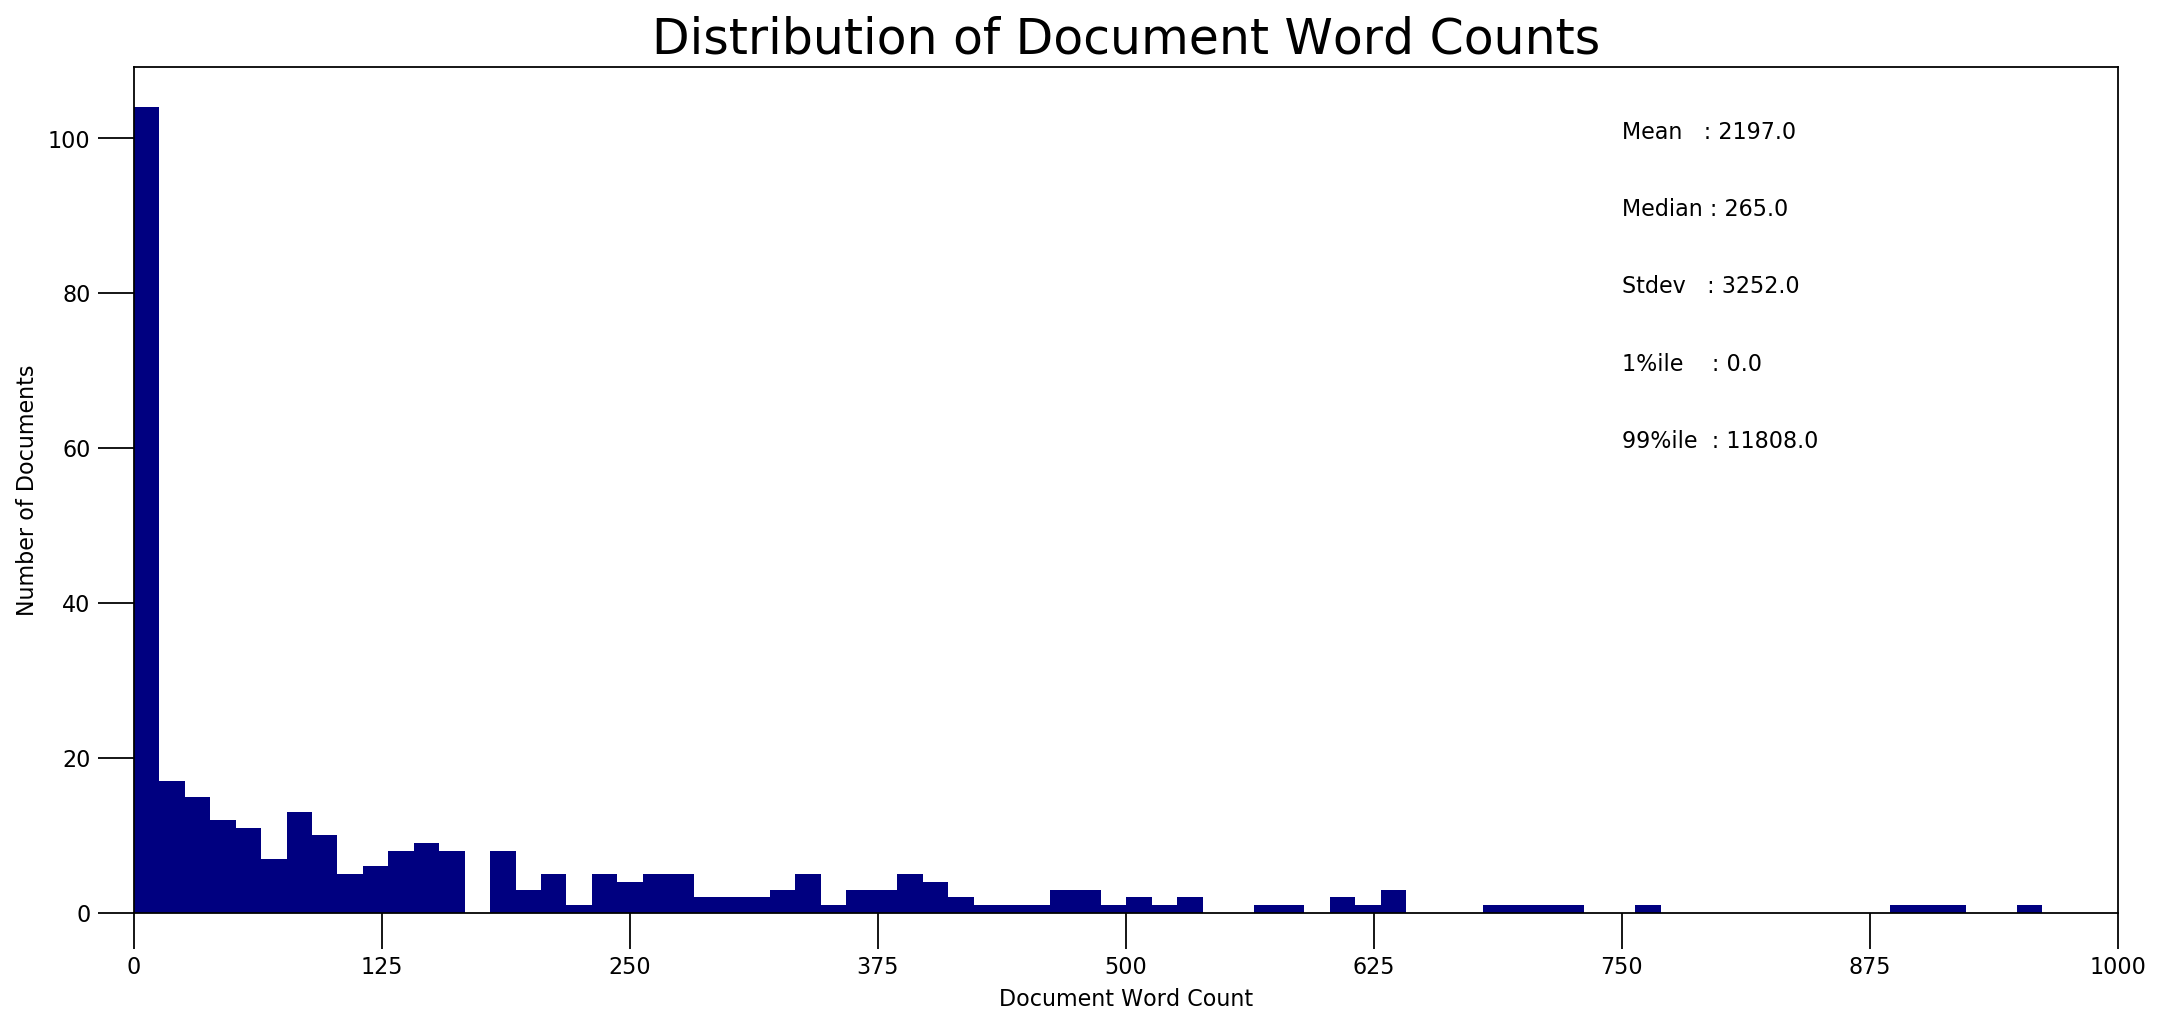

In [91]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

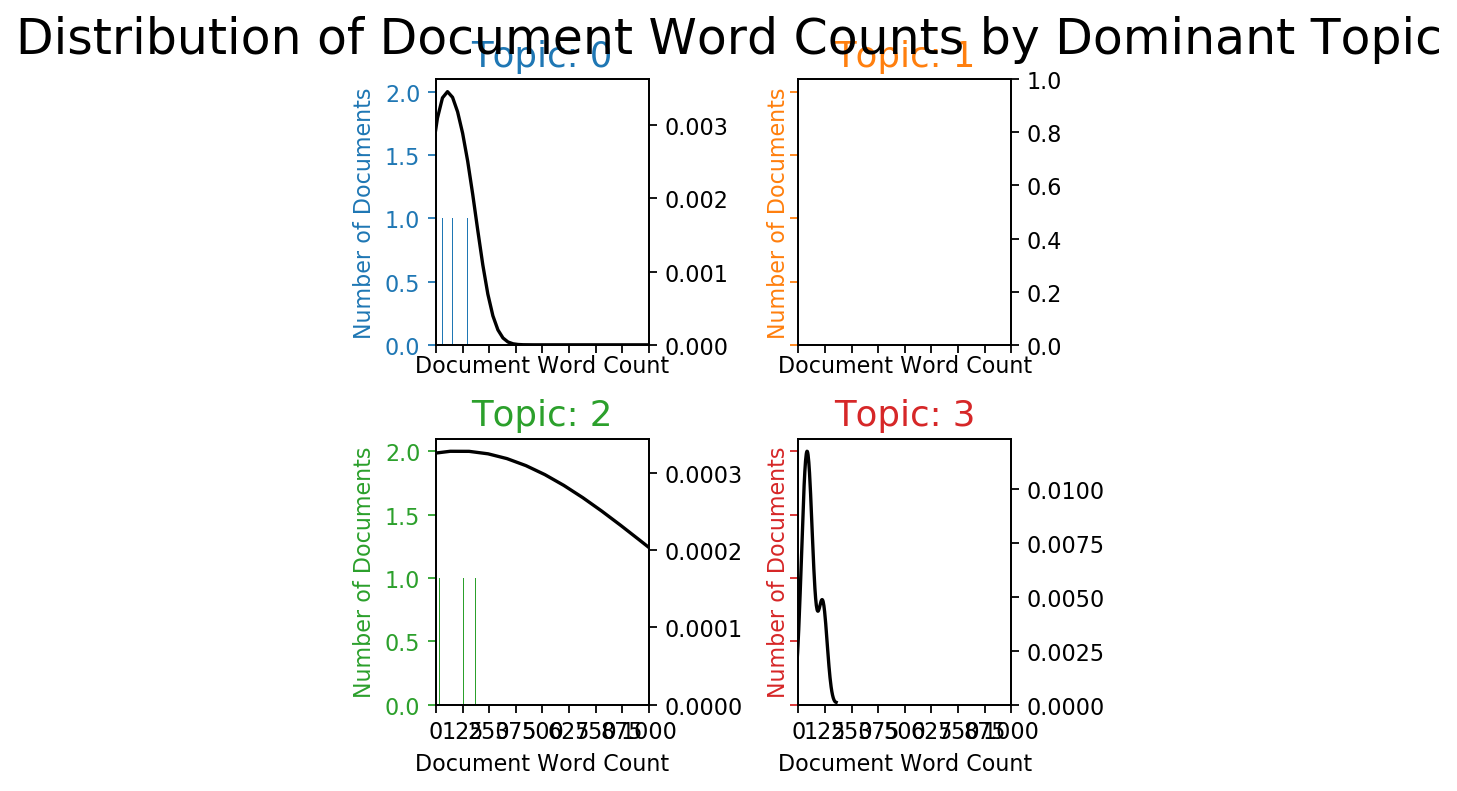

In [99]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(5,5), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

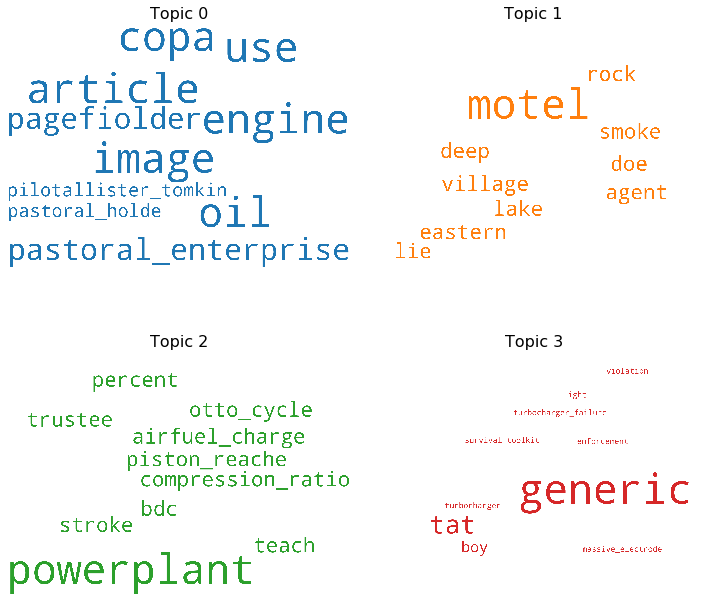

In [95]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# Form Scoring Model

In [100]:
df_total

,SourceScore,AuthorLikeProp,Comment,Content,Like,Title,ContentSubjective,ContentLen
0,1,1.000000,NaN,"i am based in colorado springs, co and often see usaf academy sr20s around the state. i recently...",1.0,oil door support for summer time cooling,0.5,695
1,1,0.750000,NaN,"""can i fix my audio volume problem?actually, the problem is not with the audio volume, but is an...",0.0,low aux audio volume problem,0.4,5520
2,1,0.750000,NaN,activating garmin 396contentsstep 1step 2step 3step 4you are done!step 1charge your garmin overn...,0.0,activating garmin 396,0.5,952
3,1,0.750000,NaN,"a good reason to do your own oil change, or at least to be present when the ritual is performed,...",3.0,oil change,0.4,13756
4,1,0.750000,NaN,contentsmicrosoft flight simulator x (fsx) and the eaglesoft sr20 or sr22 are useful tools to he...,0.0,microsoft flight simulator,0.5,5976
5,1,0.250000,NaN,"the general aviation modifications, inc. (gami) lean test verifies and measures how even the fue...",0.0,gami lean test,0.4,3546
6,1,0.250000,NaN,"""the standard pre-flight engine run-up check in the cirrus checklist is adequate to flag a non-o...",1.0,in-flight lop magneto check,0.5,6511
7,1,0.250000,NaN,"lean of peakcan you run your engine lean of peak (lop)? the simple answer is in your poh, which ...",0.0,lean of peak engine operation,0.4,1553
8,1,0.250000,NaN,use the following chart to better describe issues on the copa forums and with you aircraft mecha...,0.0,magnetos and spark plug location,0.3,100
9,1,0.103448,NaN,low aux audio volume problem,0.0,entertainment accessories,0.3,28


In [101]:
from scipy import stats

In [104]:
df_total['AuthorRank']=df_total.AuthorLikeProp.apply(lambda x: stats.percentileofscore(df_total.AuthorLikeProp,x, kind='mean'))

In [106]:
df_total['LikeRank']=df_total.Like.apply(lambda x: stats.percentileofscore(df_total.Like,x, kind='mean'))

In [109]:
df_total['CommentRank']=df_total.Comment.apply(lambda x: stats.percentileofscore(df_total.Comment,x, kind='mean'))

In [112]:
df_total['ObjectiveRank']=100-(df_total.ContentSubjective.apply(lambda x: stats.percentileofscore(df_total.ContentSubjective,x, kind='mean')))

In [132]:
df_total['CountRank']=df_total.ContentLen.apply(lambda x: stats.percentileofscore(df_total.ContentLen,x, kind='mean'))

In [141]:
df_total['SourceRank']=df_total.SourceScore.apply(lambda x: int(x)*10)

In [143]:
df_score=df_total[['AuthorRank','LikeRank','CommentRank','ObjectiveRank','CountRank','SourceRank']]

In [146]:
df_score=df_score.apply(lambda x: x.fillna(x.median()),axis=0)

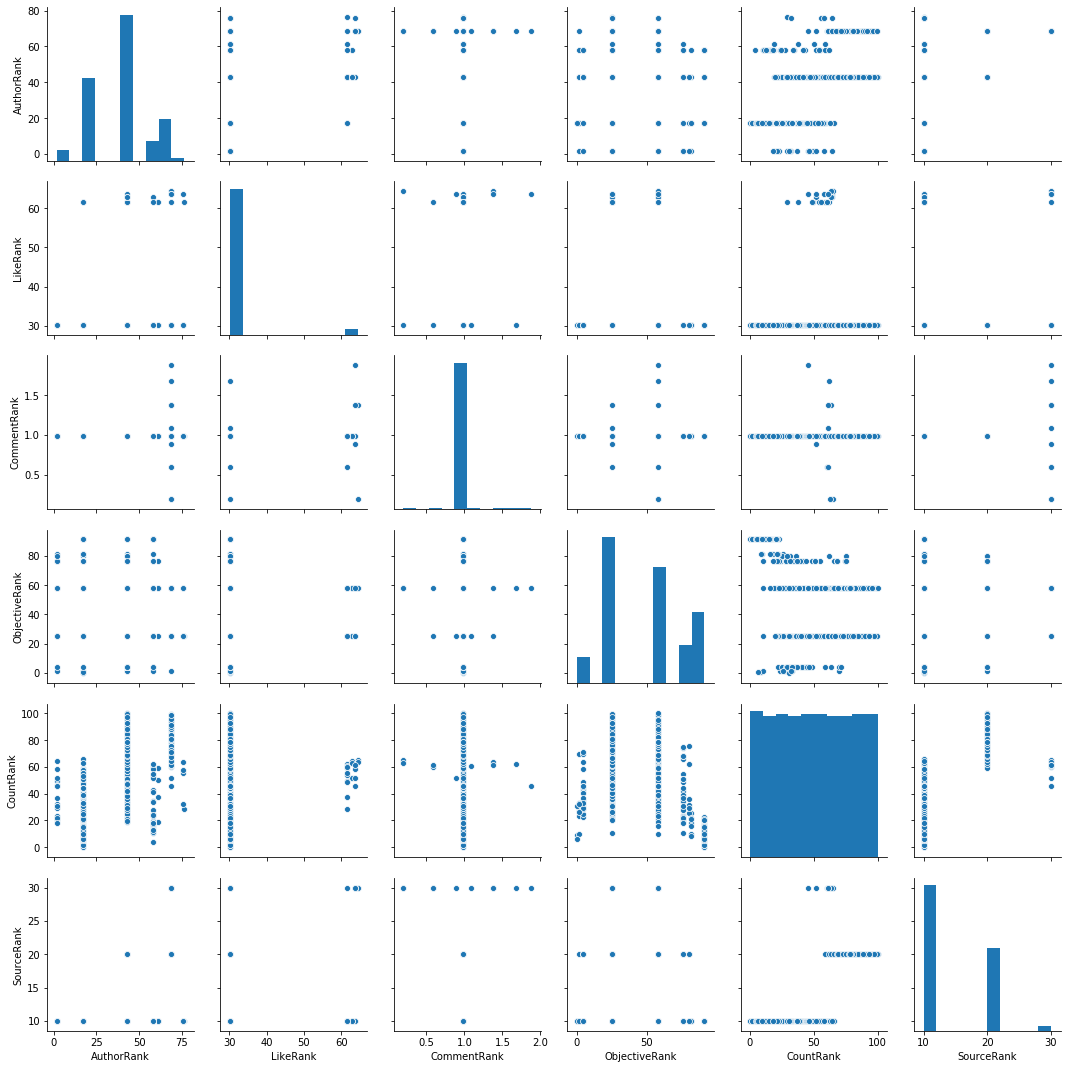

In [149]:
sns.pairplot(df_score)

In [151]:
df_total['Rank']=df_score.sum(axis = 1, skipna = True).apply(lambda x:x/5)

In [152]:
df_total

,SourceScore,AuthorLikeProp,Comment,Content,Like,Title,ContentSubjective,ContentLen,AuthorRank,LikeRank,CommentRank,ObjectiveRank,CountRank,SourceRank,Rank
0,1,1.000000,NaN,"i am based in colorado springs, co and often see usaf academy sr20s around the state. i recently...",1.0,oil door support for summer time cooling,0.5,695,76.232742,61.538462,NaN,24.950690,28.698225,10,40.481262
1,1,0.750000,NaN,"""can i fix my audio volume problem?actually, the problem is not with the audio volume, but is an...",0.0,low aux audio volume problem,0.4,5520,75.739645,30.276134,NaN,57.988166,55.719921,10,46.142012
2,1,0.750000,NaN,activating garmin 396contentsstep 1step 2step 3step 4you are done!step 1charge your garmin overn...,0.0,activating garmin 396,0.5,952,75.739645,30.276134,NaN,24.950690,32.248521,10,34.840237
3,1,0.750000,NaN,"a good reason to do your own oil change, or at least to be present when the ritual is performed,...",3.0,oil change,0.4,13756,75.739645,63.609467,NaN,57.988166,64.003945,10,54.465483
4,1,0.750000,NaN,contentsmicrosoft flight simulator x (fsx) and the eaglesoft sr20 or sr22 are useful tools to he...,0.0,microsoft flight simulator,0.5,5976,75.739645,30.276134,NaN,24.950690,57.692308,10,39.928994
5,1,0.250000,NaN,"the general aviation modifications, inc. (gami) lean test verifies and measures how even the fue...",0.0,gami lean test,0.4,3546,61.143984,30.276134,NaN,57.988166,50.000000,10,42.078895
6,1,0.250000,NaN,"""the standard pre-flight engine run-up check in the cirrus checklist is adequate to flag a non-o...",1.0,in-flight lop magneto check,0.5,6511,61.143984,61.538462,NaN,24.950690,59.072978,10,43.538462
7,1,0.250000,NaN,"lean of peakcan you run your engine lean of peak (lop)? the simple answer is in your poh, which ...",0.0,lean of peak engine operation,0.4,1553,61.143984,30.276134,NaN,57.988166,37.376726,10,39.554241
8,1,0.250000,NaN,use the following chart to better describe issues on the copa forums and with you aircraft mecha...,0.0,magnetos and spark plug location,0.3,100,61.143984,30.276134,NaN,76.035503,19.033531,10,39.495069
9,1,0.103448,NaN,low aux audio volume problem,0.0,entertainment accessories,0.3,28,57.889546,30.276134,NaN,76.035503,10.453649,10,37.128205


In [155]:
df_total.sort_values(by=['Rank'],ascending = False)

,SourceScore,AuthorLikeProp,Comment,Content,Like,Title,ContentSubjective,ContentLen,AuthorRank,LikeRank,CommentRank,ObjectiveRank,CountRank,SourceRank,Rank
317,3,0.257143,0.0,"by rick beach, copa safety chair this unusual caps deployment sequence prompted an extraordinary...",4.0,"caps deployment anomaly at colorado springs, colorado, in 2016",0.4,18574,68.441815,64.299803,0.197239,57.988166,64.990138,30,57.183432
322,3,0.257143,5.0,"foryears,safetyadvocateshavepreached that pilots need to deal with loss of control in aviation a...",4.0,"copa/cirrus aircraft examine loss of control accidents (copa pilot, jan/feb 2016)",0.4,13074,68.441815,64.299803,1.380671,57.988166,63.609467,30,57.143984
319,3,0.257143,2.0,(this article appears as the safety column in copa pilot magazine issue sept/oct 2017) table of ...,1.0,"""reach the unreachable"" safety column in copa pilot magazine sept/oct 2017",0.4,6960,68.441815,61.538462,0.591716,57.988166,60.256410,30,55.763314
386,2,0.257143,NaN,november december 201244 cirrus pilotso he had to rele. no matter we just continued on our merry...,NaN,safety feature,0.4,183644,68.441815,NaN,NaN,57.988166,99.112426,20,55.360947
328,2,0.257143,NaN,january february 201544cirrus pilotby rick beachon may 16 2013 copa member tim valentine experie...,NaN,safety feature,0.4,183011,68.441815,NaN,NaN,57.988166,98.717949,20,55.282051
374,2,0.257143,NaN,may june 201644cirrus pilotmaintain positional awareness as we walk through the hallway while pa...,NaN,safety feature,0.4,179824,68.441815,NaN,NaN,57.988166,98.520710,20,55.242604
382,2,0.257143,NaN,september october 201844 copa pilotmy preference for pilot causes grew stronger as copa safety p...,NaN,safety feature,0.4,148157,68.441815,NaN,NaN,57.988166,95.956607,20,54.729783
3,1,0.750000,NaN,"a good reason to do your own oil change, or at least to be present when the ritual is performed,...",3.0,oil change,0.4,13756,75.739645,63.609467,NaN,57.988166,64.003945,10,54.465483
344,2,0.257143,NaN,november december 201744 cirrus pilotit all started when my brother mike was visiting me from or...,NaN,safety feature,0.4,141820,68.441815,NaN,NaN,57.988166,94.575937,20,54.453649
334,2,0.257143,NaN,april 201944 copa pilotelectronic ignition systems eis are common on many aircraft today but hav...,NaN,safety feature,0.4,137916,68.441815,NaN,NaN,57.988166,93.984221,20,54.335306
